## Importing necessary libraries

In [114]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


## Storing in an array all values and preprocessing

In [115]:
dataset_df1 = pd.read_csv(r"./premonsoon/ground_water_quality_2018_pre.csv")
dataset_df2 = pd.read_csv(r"./premonsoon/ground_water_quality_2019_pre.csv")
dataset_df3 = pd.read_csv(r"./premonsoon/ground_water_quality_2020_pre.csv")
dataset_df4 = pd.read_csv(r"./premonsoon/ground_water_quality_2021_pre.csv")
dataset_df5 = pd.read_csv(r"./premonsoon/ground_water_quality_2022_pre.csv")
dataset_df6 = pd.read_csv(r"./postmonsoon/ground_water_quality_2018_post.csv")
dataset_df7 = pd.read_csv(r"./postmonsoon/ground_water_quality_2019_post.csv")
dataset_df8 = pd.read_csv(r"./postmonsoon/ground_water_quality_2020_post.csv")
dataset_df9 = pd.read_csv(r"./postmonsoon/ground_water_quality_2021_post.csv")
dataset_df = pd.concat([dataset_df1,dataset_df2,dataset_df3,dataset_df4,dataset_df5,dataset_df6,dataset_df7,dataset_df8,dataset_df9],join='outer',ignore_index=True)
dataset_df.drop(columns=['RL_GIS','sno','village','mandal','district','gwl'],inplace=True)
dataset_df['season']=dataset_df['season'].astype(str).apply(lambda x: 0 if 'pre' in x.lower() else 1)

In [116]:
dataset_df['pH'] = pd.to_numeric(dataset_df['pH'], errors='coerce')

# Now convert to float
dataset_df['pH'] = dataset_df['pH'].astype(float)
dataset_df['RSC  meq  / L'] = pd.to_numeric(dataset_df['RSC  meq  / L'], errors='coerce')

# Now convert to float
dataset_df['RSC  meq  / L'] = dataset_df['RSC  meq  / L'].astype(float)


In [117]:
#To remove rows containing null values
for index, row in dataset_df.iterrows():
    if 'NA' in row.values:
        dataset_df.drop(index, inplace=True)
    elif(row['Classification']=='OG')or(row['Classification']=='O.G')or(row['Classification']=='BELOW THE GRAPH')or(row['Classification']=='OUT OF SAR GRAPH')or(row['Classification']=='BG'):
        dataset_df.drop(index, inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [118]:
null_threshold = len(dataset_df) * 0.25
for column in dataset_df.columns:
    null_count = dataset_df[column].isnull().sum()
    if null_count > null_threshold:
        dataset_df.drop(column, axis=1, inplace=True)
    elif null_count > 0:
        dataset_df.dropna(subset=[column], inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [119]:
dataset_df.columns

Index(['long_gis', 'lat_gis', 'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3',
       'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR',
       'Classification', 'RSC  meq  / L', 'Classification.1'],
      dtype='object')

In [120]:
dataset_df.describe()

,long_gis,lat_gis,season,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.00000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,66.772025,29.599037,0.387202,7.843799,1233.101610,789.881749,5.41146,268.275171,174.904218,1.037786,60.958889,49.644993,117.753836,8.560754,68.429224,47.475201,366.806037,2.790353,-1.865046
std,24.484076,24.306903,0.487160,0.458430,738.381329,473.032944,16.97257,128.542345,171.081966,0.812726,79.534434,63.171954,103.979699,21.907266,52.806161,34.073709,216.250298,2.589769,4.136058
min,0.000000,0.000000,0.000000,6.160000,102.000000,65.280000,0.00000,10.000000,10.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.100000,19.995888,0.140000,-59.584539
25%,77.770000,17.270000,0.000000,7.530000,750.000000,481.000000,0.00000,180.000000,60.000000,0.520000,13.488318,16.000000,53.000000,2.000000,32.000000,24.310000,220.000000,1.360000,-3.200000
50%,78.474600,17.970000,0.000000,7.880000,1047.000000,670.720000,0.00000,250.000000,120.000000,0.840000,36.000000,29.000000,88.000000,3.220000,56.000000,39.000000,320.000000,2.090000,-1.200000
75%,79.290000,19.024500,1.000000,8.180000,1520.000000,974.000000,0.00000,340.000000,220.000000,1.290000,74.559325,55.000000,145.450000,6.870000,88.000000,63.000000,459.893092,3.225302,0.001000
max,81.180000,81.180000,1.000000,10.590000,9499.000000,6079.360000,200.00000,1240.000000,2480.000000,13.700000,1028.000000,860.000000,1154.000000,356.000000,640.000000,457.028000,3479.226974,31.435063,18.200822


In [121]:
dataset_df.shape

(4907, 21)

In [122]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907 entries, 0 to 4906
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   long_gis          4907 non-null   float64
 1   lat_gis           4907 non-null   float64
 2   season            4907 non-null   int64  
 3   pH                4907 non-null   float64
 4   E.C               4907 non-null   float64
 5   TDS               4907 non-null   float64
 6   CO3               4907 non-null   float64
 7   HCO3              4907 non-null   float64
 8   Cl                4907 non-null   float64
 9   F                 4907 non-null   float64
 10  NO3               4907 non-null   float64
 11  SO4               4907 non-null   float64
 12  Na                4907 non-null   float64
 13  K                 4907 non-null   float64
 14  Ca                4907 non-null   float64
 15  Mg                4907 non-null   float64
 16  T.H               4907 non-null   float64


In [123]:
all_labels=dataset_df['Classification'].unique()
for label in all_labels:
    print(label)

C3S1
C2S1
C3S2
C4S1
C4S2
C1S1
C4S3
C4S4
C3S3
C3S4
C2S2


In [124]:
print(len(dataset_df[dataset_df['Classification']=='OG']),len(dataset_df[dataset_df['Classification']=='O.G']),len(dataset_df[dataset_df['Classification']=='BELOW THE GRAPH']),len(dataset_df[dataset_df['Classification']=='OUT OF SAR GRAPH']),len(dataset_df[dataset_df['Classification']=='BG']))

0 0 0 0 0


In [125]:
#encoding/labelling the target column
label_mapping = {
    label: index for index, label in enumerate(dataset_df['Classification'].unique())
}
# Map labels to numerical values
dataset_df['Classification'] = dataset_df['Classification'].map(label_mapping)
dataset_df['Classification'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [126]:
label_mapping

{'C3S1': 0,
 'C2S1': 1,
 'C3S2': 2,
 'C4S1': 3,
 'C4S2': 4,
 'C1S1': 5,
 'C4S3': 6,
 'C4S4': 7,
 'C3S3': 8,
 'C3S4': 9,
 'C2S2': 10}

In [127]:
#standardisation of the data
means = dataset_df.drop(columns=['Classification','Classification.1']).mean()
stds = dataset_df.drop(columns=['Classification','Classification.1']).std()
for col in dataset_df.columns:
    if col != 'Classification' and col != 'Classification.1':  # Exclude target column from standardization
        dataset_df[col] = (dataset_df[col] - means[col]) / stds[col]
#min max scaling
#for col in dataset_df.columns:
#    if col != 'Classification' and col!='Classification.1':  # Exclude the target column
#        min_val = dataset_df[col].min()
#        max_val = dataset_df[col].max()
#        dataset_df[col] = (dataset_df[col] - min_val) / (max_val - min_val)


In [128]:
# randomising the dataframe and splitting to get train and test dataframes
dataset_df = dataset_df.sample(frac=1, random_state=42)
num_rows = len(dataset_df)
train_size = int(0.8 * num_rows)
test_size = num_rows - train_size
# Split the DataFrame into training and testing sets
train_dataset_df = dataset_df.head(train_size)
test_dataset_df = dataset_df.tail(test_size)

## Implementation of softmax regression

![image.png](softmaxExplanation.png)

The softmax regression predicts probability of any instance to belong to one of the class using softmax function. Here z1,z2,..,zc denote linear combination of input features. (c is number of classes here). Here gradient descent would be used to find the weights( which are used to calculate zi's and ultimately the probabilities).

In [129]:
X_train = train_dataset_df.drop(columns=['Classification','Classification.1'], axis=1).values
y_train = train_dataset_df['Classification'].values
X_test = test_dataset_df.drop(columns=['Classification','Classification.1'], axis=1).values
y_test = test_dataset_df['Classification'].values
print("The shape of training data is (it is a dataframe):",X_train.shape)
num_of_features=X_train.shape[1]
num_of_classes=len(label_mapping)

The shape of training data is (it is a dataframe): (3925, 19)


In [130]:
class SoftmaxRegression:
    #Learning rate is preset to 0.01 and number of epochs is set to 1000
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.01, num_epochs=1000):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = np.zeros((num_of_features, num_of_classes))#initially all weights and biases are set to 0
        self.b = np.zeros(num_of_classes)
        self.loss_history = []

    def softmax(self, z):#softmax function, z is matrix, where each row corresponds to a sample and each column is a class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))#subtracted the maximum value in each row to help prevent overflow and maintain numerical stability in exponentiation
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):#y is labels of input ,vector
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1#for each row, column corresponding to that sample is set to one and others to 0
        return one_hot_y

    #forward and backward propogation
    def fit(self, X, y):
        y_one_hot = self.one_hot_encode(y)
        #training loop
        for epoch in range(self.num_epochs):
            #forward propogation, 
            z = np.dot(X, self.W) + self.b#result z is also a matrix
            y_pred = self.softmax(z)#result is a matrix
            loss = self.cross_entropy_loss(y_one_hot, y_pred)#loss function used is cross entropy loss
            self.loss_history.append(loss)
            dz = y_pred - y_one_hot#update
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0)
            #backward propogation
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        self.plot_loss()
        
    #loss over epochs
    def plot_loss(self,window_size=15):
        loss_ma = np.convolve(self.loss_history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(range(window_size, self.num_epochs + 1), loss_ma, label=f'Training Loss(learning-rate-{self.learning_rate})')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid zeros
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))#cross entropy function is used here


    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        return np.argmax(y_pred, axis=1)#choose that class with largest probability for each class
    
    def evaluate(self, X, y,print_confusion_matrix=False):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        
        # Calculate precision, recall, and F1-score
        tp = np.sum((y_pred == y) & (y_pred == 1))#true positives
        fp = np.sum((y_pred != y) & (y_pred == 1))#false positives
        fn = np.sum((y_pred != y) & (y_pred == 0))#false negatives
        if (tp + fp != 0):
            precision = tp / (tp + fp)  
        else:
            precision = 0
        if (tp + fn != 0):
            recall = tp / (tp + fn) 
        else :
            recall=0
        if (precision+recall !=0):
            f1_score = 2 * precision * recall / (precision + recall)
        else :
            f1_score=0
        print(f"Precision:{precision:.4f}")
        print(f"Recall:{precision:.4f}")
        print(f"Accuracy:{precision:.4f}")
        print(f"F1_Score:{f1_score:.4f}")
        if print_confusion_matrix:
            confusion = confusion_matrix(y, y_pred)
            self.plot_confusion_matrix(confusion)
        self.plot_ROC_Curve(X)
    
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
    def calculate_auc(self,tprs, fprs):
        #to get auc for each class
        sorted_indices = np.argsort(fprs)
        fprs_sorted = np.array(fprs)[sorted_indices]
        tprs_sorted = np.array(tprs)[sorted_indices]
        auc = np.trapz(tprs_sorted, fprs_sorted)
        return auc
    def calculate_rates(self,y_pred,y_true,class_index):
        #to calculate tpr and fpr for each class at various thresholds
        thresholds = np.linspace(0, 1, 1000)
        tprs = []
        fprs = []
        for threshold in thresholds:
            y_pred_binary = (y_pred[:, class_index] >= threshold).astype(int)
            true_positives = np.sum((y_pred_binary == 1) & (y_true == class_index))
            false_positives = np.sum((y_pred_binary == 1) & (y_true != class_index))
            false_negatives = np.sum((y_pred_binary == 0) & (y_true == class_index))
            true_negatives = np.sum((y_pred_binary == 0) & (y_true != class_index))
            tpr = true_positives / (true_positives + false_negatives)
            fpr = false_positives / (false_positives + true_negatives)
            tprs.append(tpr)
            fprs.append(fpr)
        auc = self.calculate_auc(tprs, fprs)
        return tprs, fprs,auc
    
    def plot_ROC_Curve(self,X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        plt.figure(figsize=(8, 6))
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plot the random classifier line
        for class_index in range(num_of_classes):
            tprs, fprs ,auc= self.calculate_rates(y_pred, y_test, class_index)
            plt.plot(fprs, tprs, label=f'Class {class_index} (AUC = {auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves for Softmax Regression')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    @staticmethod
    def calculate_moving_average(loss_history, window_size):
        return np.convolve(loss_history, np.ones(window_size)/window_size, mode='valid')

    @staticmethod
    def plot_losses(softmax_instances, labels, window_size=10):
        plt.figure(figsize=(10, 6))
        for softmax_instance, label in zip(softmax_instances, labels):
            loss_ma = SoftmaxRegression.calculate_moving_average(softmax_instance.loss_history, window_size)
            plt.plot(range(window_size, softmax_instance.num_epochs + 1), loss_ma, label=label)
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

Epoch 100/1000, Loss: 0.3783
Epoch 200/1000, Loss: 0.3348
Epoch 300/1000, Loss: 0.3155
Epoch 400/1000, Loss: 0.3030
Epoch 500/1000, Loss: 0.2936
Epoch 600/1000, Loss: 0.2863
Epoch 700/1000, Loss: 0.2805
Epoch 800/1000, Loss: 0.2757
Epoch 900/1000, Loss: 0.2717
Epoch 1000/1000, Loss: 0.2682


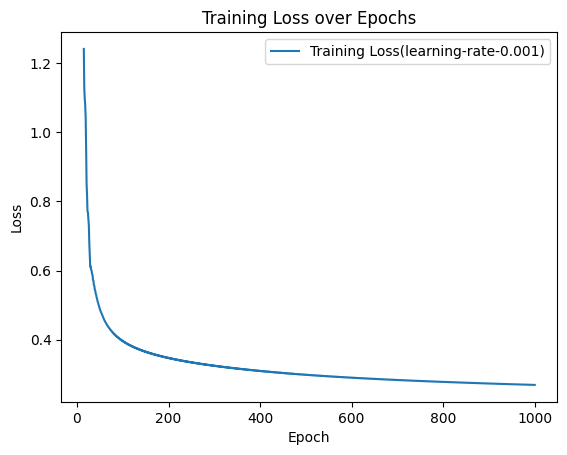

Epoch 100/1000, Loss: 0.6939
Epoch 200/1000, Loss: 0.5655
Epoch 300/1000, Loss: 0.5143
Epoch 400/1000, Loss: 0.4830
Epoch 500/1000, Loss: 0.4602
Epoch 600/1000, Loss: 0.4433
Epoch 700/1000, Loss: 0.4314
Epoch 800/1000, Loss: 0.4230
Epoch 900/1000, Loss: 0.4166
Epoch 1000/1000, Loss: 0.4114


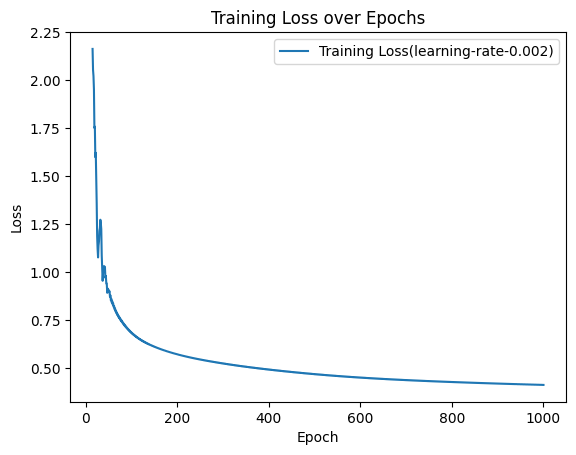

Epoch 100/1000, Loss: 1.0885
Epoch 200/1000, Loss: 0.8890
Epoch 300/1000, Loss: 0.7628
Epoch 400/1000, Loss: 0.7068
Epoch 500/1000, Loss: 0.6718
Epoch 600/1000, Loss: 0.6435
Epoch 700/1000, Loss: 0.6198
Epoch 800/1000, Loss: 0.6015
Epoch 900/1000, Loss: 0.5881
Epoch 1000/1000, Loss: 0.5779


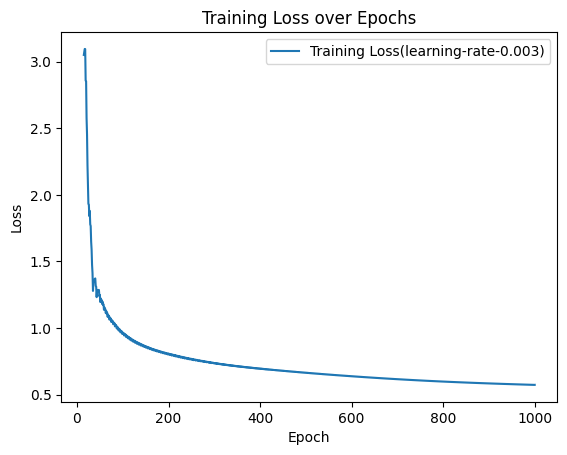

Epoch 100/1000, Loss: 1.0549
Epoch 200/1000, Loss: 0.9360
Epoch 300/1000, Loss: 0.8821
Epoch 400/1000, Loss: 0.8402
Epoch 500/1000, Loss: 0.8113
Epoch 600/1000, Loss: 0.7829
Epoch 700/1000, Loss: 0.7548
Epoch 800/1000, Loss: 0.7303
Epoch 900/1000, Loss: 0.7132
Epoch 1000/1000, Loss: 0.6992


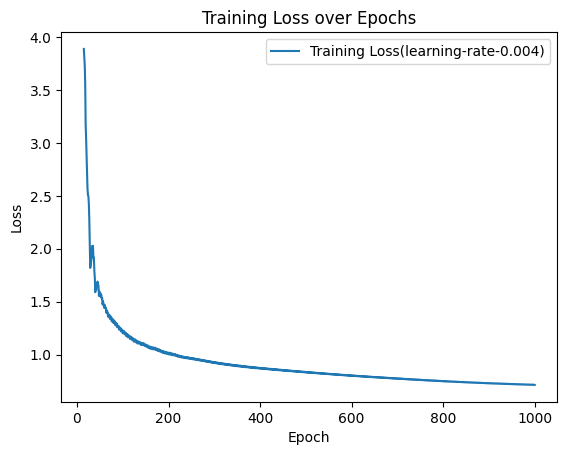

Epoch 100/1000, Loss: 1.2226
Epoch 200/1000, Loss: 1.1350
Epoch 300/1000, Loss: 1.0149
Epoch 400/1000, Loss: 0.9722
Epoch 500/1000, Loss: 0.9409
Epoch 600/1000, Loss: 0.9134
Epoch 700/1000, Loss: 0.8870
Epoch 800/1000, Loss: 0.8589
Epoch 900/1000, Loss: 0.8324
Epoch 1000/1000, Loss: 0.8158


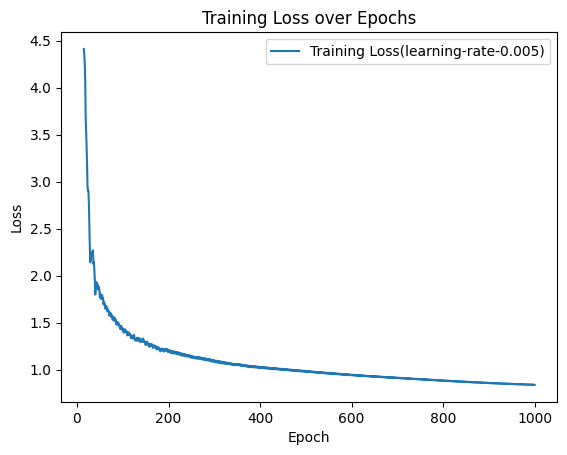

Epoch 100/1000, Loss: 1.7658
Epoch 200/1000, Loss: 1.8015
Epoch 300/1000, Loss: 1.5502
Epoch 400/1000, Loss: 1.4721
Epoch 500/1000, Loss: 1.4144
Epoch 600/1000, Loss: 1.3469
Epoch 700/1000, Loss: 1.3223
Epoch 800/1000, Loss: 1.2960
Epoch 900/1000, Loss: 1.2694
Epoch 1000/1000, Loss: 1.2498


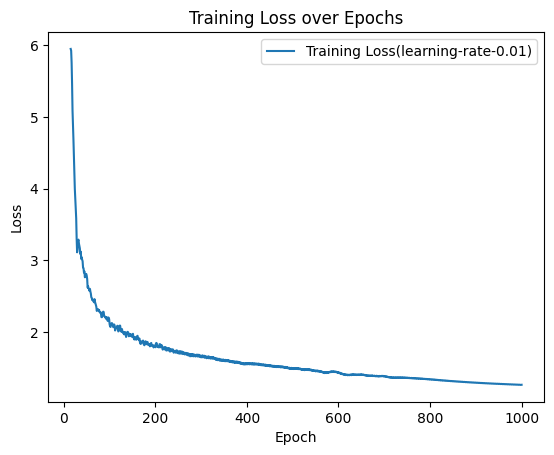

Epoch 100/1000, Loss: 4.1928
Epoch 200/1000, Loss: 3.4441
Epoch 300/1000, Loss: 3.2759
Epoch 400/1000, Loss: 3.2239
Epoch 500/1000, Loss: 2.9676
Epoch 600/1000, Loss: 2.9369
Epoch 700/1000, Loss: 2.9524
Epoch 800/1000, Loss: 2.7262
Epoch 900/1000, Loss: 2.6413
Epoch 1000/1000, Loss: 2.7130


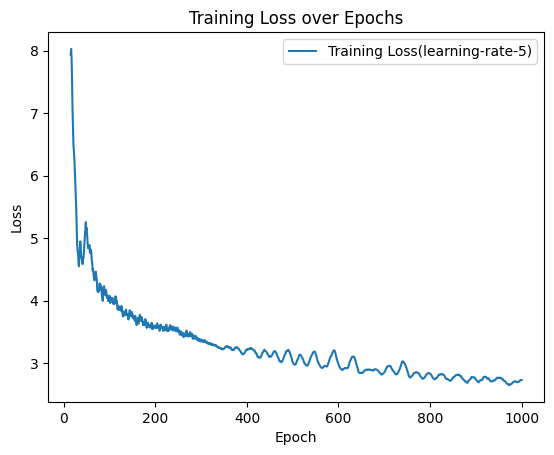

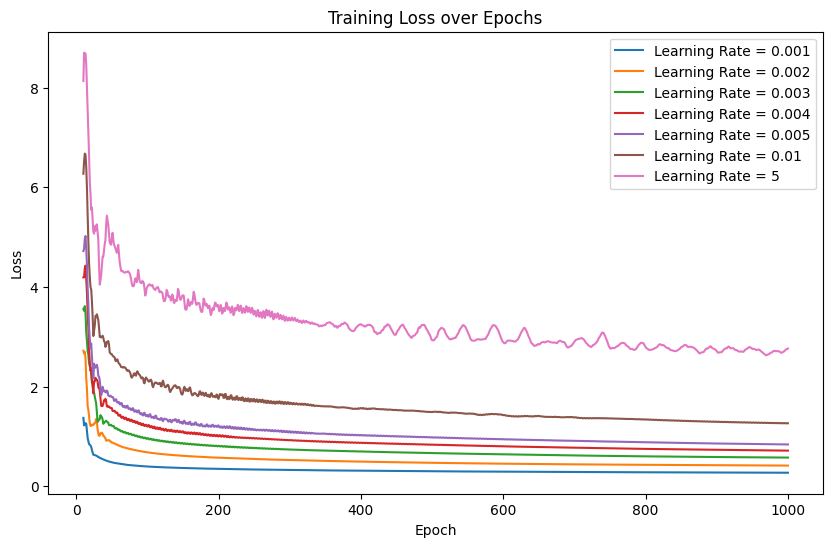

In [131]:
learning_rates = [0.001,0.002,0.003,0.004,0.005,0.01,5]
softmax_instances = []
labels = []
for lr in learning_rates:
    softmax_instance = SoftmaxRegression(num_of_features, num_of_classes, learning_rate=lr)
    softmax_instance.fit(X_train, y_train)
    softmax_instances.append(softmax_instance)
    labels.append(f'Learning Rate = {lr}')

SoftmaxRegression.plot_losses(softmax_instances, labels)

## Fitting the model/training

Epoch 100/1000, Loss: 1.7658
Epoch 200/1000, Loss: 1.8015
Epoch 300/1000, Loss: 1.5502
Epoch 400/1000, Loss: 1.4721
Epoch 500/1000, Loss: 1.4144
Epoch 600/1000, Loss: 1.3469
Epoch 700/1000, Loss: 1.3223
Epoch 800/1000, Loss: 1.2960
Epoch 900/1000, Loss: 1.2694
Epoch 1000/1000, Loss: 1.2498


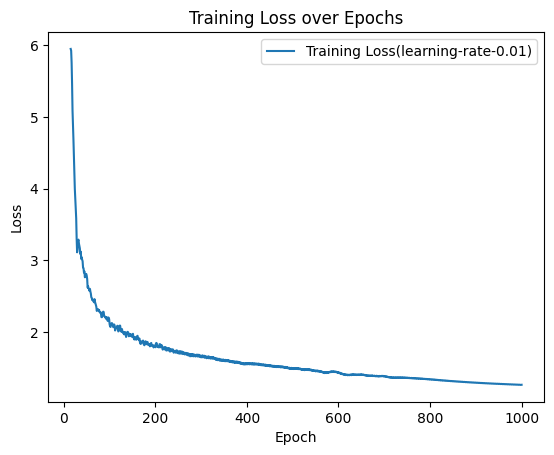

In [132]:
softmax_model = SoftmaxRegression(num_of_features, num_of_classes)
softmax_model.fit(X_train, y_train)

## Evaluating the model

Precision:0.8643
Recall:0.8643
Accuracy:0.8643
F1_Score:0.8902


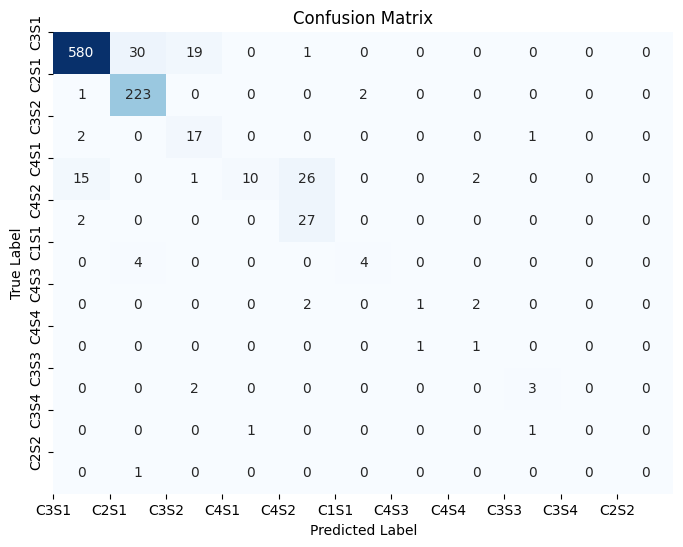

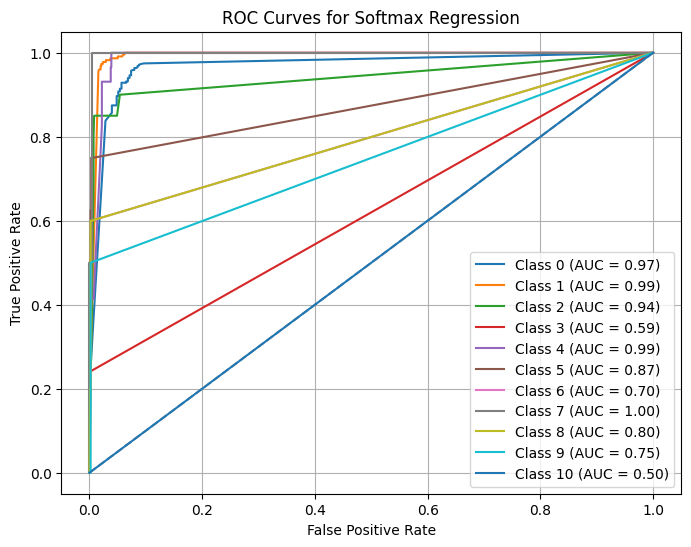

In [133]:
softmax_model.evaluate(X_test,y_test,True)

Precision:0.9643
Recall:0.9643
Accuracy:0.9643
F1_Score:0.9290


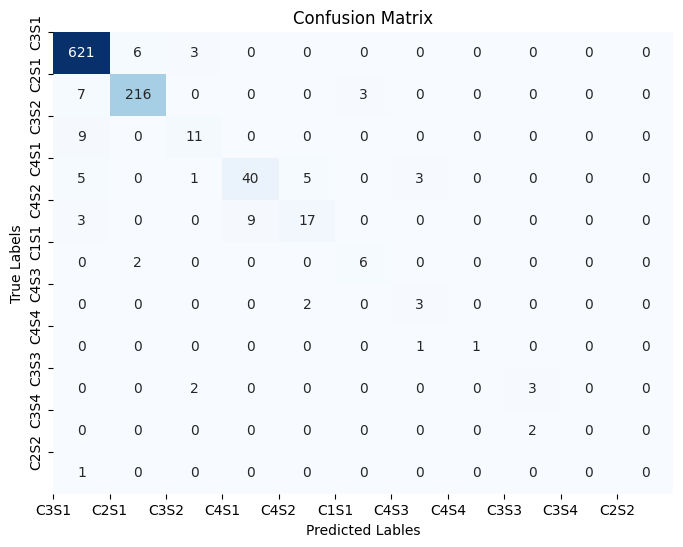

In [134]:
# with using scikit learns function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Train softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train, y_train)
# Predict on the test set
y_pred = softmax_reg.predict(X_test)
# Calculate accuracy,precision, recall,f1score
accuracy = np.mean(y_pred == y_test)
# Calculate precision, recall, and F1-score
tp = np.sum((y_pred == y_test) & (y_pred == 1))#true positives
fp = np.sum((y_pred != y_test) & (y_pred == 1))#false positives
fn = np.sum((y_pred != y_test) & (y_pred == 0))#false negatives
if (tp + fp != 0):
    precision = tp / (tp + fp)  
else:
    precision = 0
if (tp + fn != 0):
    recall = tp / (tp + fn) 
else :
    recall=0
if (precision+recall !=0):
    f1_score = 2 * precision * recall / (precision + recall)
else :
    f1_score=0
print(f"Precision:{precision:.4f}")
print(f"Recall:{precision:.4f}")
print(f"Accuracy:{precision:.4f}")
print(f"F1_Score:{f1_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.xlabel('Predicted Lables')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Looking for optimizations

### Tackling Class Imbalances

### This class implements Softmax Regression for multiclass classification with provisions for handling class imbalances. It adjusts gradient updates during training by incorporating class weights to mitigate the impact of uneven class distributions.

In [135]:
#for removing class imbalances
class_counts = np.bincount(y_train) 
total_samples = len(y_train)
# Calculate class weights for each class
class_weights = total_samples / (num_of_classes * class_counts)
# Define the class weights dictionary
class_weight_dict = {class_index: class_weights[class_index] for class_index in range(num_of_classes-1)}
class_counts

array([2477,  943,   92,  184,  119,   44,   20,   24,   18,    4],
      dtype=int64)

In [136]:
class_weight_dict

{0: 0.14405255624472418,
 1: 0.378386194929143,
 2: 3.8784584980237153,
 3: 1.9392292490118577,
 4: 2.9984721161191747,
 5: 8.109504132231406,
 6: 17.84090909090909,
 7: 14.867424242424242,
 8: 19.82323232323232,
 9: 89.20454545454545}

In [137]:
class SoftmaxRegression_ClassImbalanced:
    #Learning rate is preset to 0.01 and number of epochs is set to 1000
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.01, num_epochs=1000,class_weights=None):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = np.zeros((num_of_features, num_of_classes))#initially all weights and biases are set to 0
        self.b = np.zeros(num_of_classes)
        self.loss_history = []
        self.class_weights = class_weights if class_weights is not None else np.ones(num_of_classes)

    def softmax(self, z):#softmax function, z is matrix, where each row corresponds to a sample and each column is a class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))#subtracted the maximum value in each row to help prevent overflow and maintain numerical stability in exponentiation
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):#y is labels of input ,vector
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1#for each row, column corresponding to that sample is set to one and others to 0
        return one_hot_y

    #forward and backward propogation
    def fit(self, X, y):
        y_one_hot = self.one_hot_encode(y)
        #training loop
        for epoch in range(self.num_epochs):
            #forward propogation, 
            z = np.dot(X, self.W) + self.b#result z is also a matrix
            y_pred = self.softmax(z)#result is a matrix
            loss = self.cross_entropy_loss(y_one_hot, y_pred)#loss function used is cross entropy loss
            self.loss_history.append(loss)
            dz = y_pred - y_one_hot#update
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0)
            #Considering class imbalances
            dW *= self.class_weights.T
            db *= self.class_weights
            #backward propogation
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        self.plot_loss()
        
    #loss over epochs
    def plot_loss(self):
        plt.plot(range(1, self.num_epochs + 1), self.loss_history, label='Training Loss')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid zeros
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))#cross entropy function is used here


    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        return np.argmax(y_pred, axis=1)#choose that class with largest probability for each class
    
    def evaluate(self, X, y,print_confusion_matrix=False):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        
        # Calculate precision, recall, and F1-score
        tp = np.sum((y_pred == y) & (y_pred == 1))#true positives
        fp = np.sum((y_pred != y) & (y_pred == 1))#false positives
        fn = np.sum((y_pred != y) & (y_pred == 0))#false negatives
        if (tp + fp != 0):
            precision = tp / (tp + fp)  
        else:
            precision = 0
        if (tp + fn != 0):
            recall = tp / (tp + fn) 
        else :
            recall=0
        if (precision+recall !=0):
            f1_score = 2 * precision * recall / (precision + recall)
        else :
            f1_score=0
        print(f"Precision:{precision:.4f}")
        print(f"Recall:{precision:.4f}")
        print(f"Accuracy:{precision:.4f}")
        print(f"F1_Score:{f1_score:.4f}")
        if print_confusion_matrix:
            confusion = confusion_matrix(y, y_pred)
            self.plot_confusion_matrix(confusion)
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        

Epoch 100/1000, Loss: 2.5585
Epoch 200/1000, Loss: 2.6142
Epoch 300/1000, Loss: 2.1864
Epoch 400/1000, Loss: 2.2533
Epoch 500/1000, Loss: 1.9786
Epoch 600/1000, Loss: 2.4571
Epoch 700/1000, Loss: 1.9031
Epoch 800/1000, Loss: 2.5348
Epoch 900/1000, Loss: 1.7962
Epoch 1000/1000, Loss: 1.7997


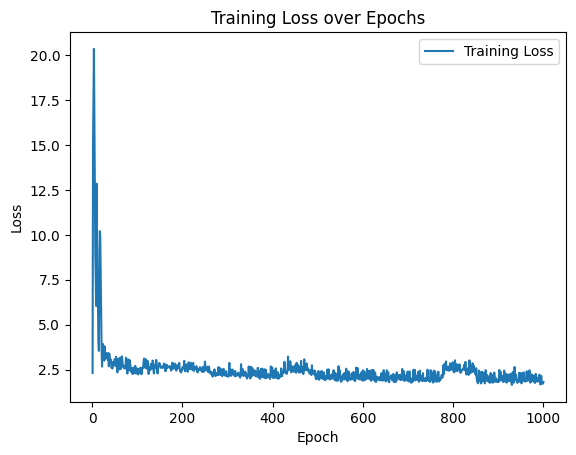

In [138]:
softmax_model_changed = SoftmaxRegression_ClassImbalanced(num_of_features, num_of_classes-1,class_weights)
softmax_model_changed.fit(X_train, y_train)

Precision:0.9605
Recall:0.9605
Accuracy:0.9605
F1_Score:0.9440


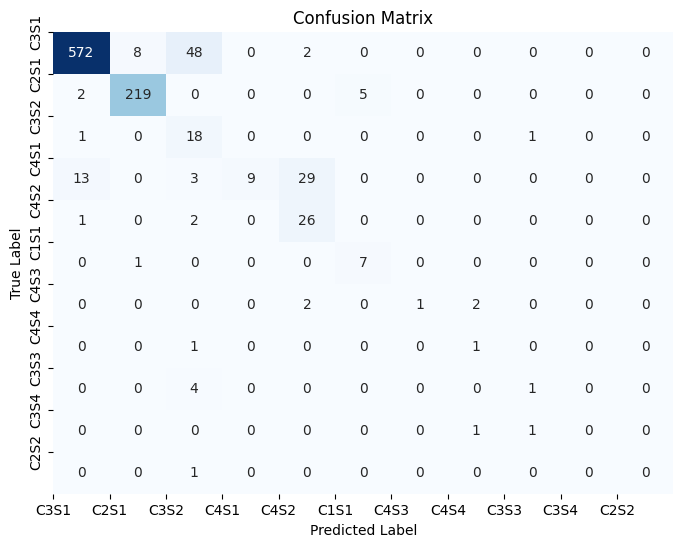

In [139]:
softmax_model_changed.evaluate(X_test,y_test,True)

### Hyperparameter tuning

### The SoftmaxRegression_another class incorporates hyperparameter tuning via grid search. It systematically evaluates combinations of learning rates and regularization strengths to find the optimal settings, enhancing model performance and generalization on validation data.

In [140]:
dataset_df = dataset_df.sample(frac=1, random_state=42)
num_rowsv = len(dataset_df)
trainv_size = int(0.7 * num_rows)
valv_size=int(0.1 * num_rows)
testv_size = num_rows - train_size - valv_size
# Split the DataFrame into training and testing sets and validation dataframes
train_dataset_dfv = dataset_df.head(train_size)
val_dataset_dfv=dataset_df.iloc[trainv_size: trainv_size + valv_size]
test_dataset_dfv = dataset_df.tail(test_size)


In [141]:
#storing the values of dataframe in appropriate arrays
X_train = train_dataset_dfv.drop(columns=['Classification','Classification.1'], axis=1).values
y_train = train_dataset_dfv['Classification'].values
X_test = test_dataset_dfv.drop(columns=['Classification','Classification.1'], axis=1).values
y_test = test_dataset_dfv['Classification'].values
X_val = val_dataset_dfv.drop(columns=['Classification','Classification.1'],axis=1).values
y_val = val_dataset_dfv['Classification'].values

In [142]:
class SoftmaxRegression_another:
    #Learning rate is preset to 0.01 and number of epochs is set to 1000
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.01, num_epochs=1000,reg_strength=0.01):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = np.zeros((num_of_features, num_of_classes))#initially all weights and biases are set to 0
        self.b = np.zeros(num_of_classes)
        self.loss_history = []
        self.reg_strength=reg_strength

    def softmax(self, z):#softmax function, z is matrix, where each row corresponds to a sample and each column is a class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))#subtracted the maximum value in each row to help prevent overflow and maintain numerical stability in exponentiation
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):#y is labels of input ,vector
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1#for each row, column corresponding to that sample is set to one and others to 0
        return one_hot_y

    #forward and backward propogation
    def fit(self, X, y,isprint=False):
        y_one_hot = self.one_hot_encode(y)
        #training loop
        for epoch in range(self.num_epochs):
            #forward propogation, 
            z = np.dot(X, self.W) + self.b#result z is also a matrix
            y_pred = self.softmax(z)#result is a matrix
            loss = self.cross_entropy_loss(y_one_hot, y_pred)#loss function used is cross entropy loss
            self.loss_history.append(loss)
            dz = y_pred - y_one_hot#update
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0)
            #for l2 regularisation
            dW += self.reg_strength * self.W
            #backward propogation
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch+1) % 100 == 0 and isprint:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        if isprint:
            self.plot_loss()
        
    #loss over epochs
    def plot_loss(self):
        plt.plot(range(1, self.num_epochs + 1), self.loss_history, label='Training Loss')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid zeros
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))#cross entropy function is used here
    
    def predict_probabilities(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)
        return y_pred


    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        return np.argmax(y_pred, axis=1)#choose that class with largest probability for each class
    
    def evaluate(self, X, y,print_confusion_matrix=False):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        
        # Calculate precision, recall, and F1-score
        tp = np.sum((y_pred == y) & (y_pred == 1))#true positives
        fp = np.sum((y_pred != y) & (y_pred == 1))#false positives
        fn = np.sum((y_pred != y) & (y_pred == 0))#false negatives
        if (tp + fp != 0):
            precision = tp / (tp + fp)  
        else:
            precision = 0
        if (tp + fn != 0):
            recall = tp / (tp + fn) 
        else :
            recall=0
        if (precision+recall !=0):
            f1_score = 2 * precision * recall / (precision + recall)
        else :
            f1_score=0
        print(f"Precision:{precision:.4f}")
        print(f"Recall:{precision:.4f}")
        print(f"Accuracy:{precision:.4f}")
        print(f"F1_Score:{f1_score:.4f}")
        if print_confusion_matrix:
            confusion = confusion_matrix(y, y_pred)
            self.plot_confusion_matrix(confusion)
    
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
    def calculate_auc(self,tprs, fprs):
        #to get auc for each class
        sorted_indices = np.argsort(fprs)
        fprs_sorted = np.array(fprs)[sorted_indices]
        tprs_sorted = np.array(tprs)[sorted_indices]
        auc = np.trapz(tprs_sorted, fprs_sorted)
        return auc
    
    @staticmethod#as we should be able to set the parameters without instantiating the model itself
    def grid_search(X_train, y_train, X_val, y_val, lr_values, reg_strength_values, num_epochs):
        best_accuracy = 0#to get best accuracy we are checking for best possible lr and best reg_strength among given parameters
        best_lr = None
        best_reg_strength = None
        accuracy_matrix = np.zeros((len(lr_values), len(reg_strength_values)))

        for i, lr in enumerate(lr_values):
            for j, reg_strength in enumerate(reg_strength_values):
                model = SoftmaxRegression_another(num_of_features=X_train.shape[1], num_of_classes=num_of_classes,
                                          learning_rate=lr, num_epochs=num_epochs, reg_strength=reg_strength)
                model.fit(X_train, y_train, isprint=False)
                accuracy = np.mean(model.predict(X_val) == y_val)
                accuracy_matrix[i, j] = accuracy
                #if better accuracy is obtained then update final parameters
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_lr = lr
                    best_reg_strength = reg_strength

        # Visualize accuracy matrix
        plt.figure(figsize=(10, 6))
        sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='YlGnBu', xticklabels=reg_strength_values, yticklabels=lr_values)
        plt.title('Accuracy Heatmap for Different Learning Rates and Regularization Strengths')
        plt.xlabel('Regularization Strength')
        plt.ylabel('Learning Rate')
        plt.show()

        return best_lr, best_reg_strength
    
    @staticmethod
    def calculate_moving_average(loss_history, window_size):
        return np.convolve(loss_history, np.ones(window_size)/window_size, mode='valid')

    @staticmethod
    def plot_losses(softmax_instances, reg_strength_values, window_size=10):
        plt.figure(figsize=(10, 6))
        for softmax_instance, reg_strength in zip(softmax_instances, reg_strength_values):
            loss_ma = SoftmaxRegression_another.calculate_moving_average(softmax_instance.loss_history, window_size)
            plt.plot(range(window_size, softmax_instance.num_epochs + 1), loss_ma, label=f"Regularization Strength: {reg_strength}")
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    

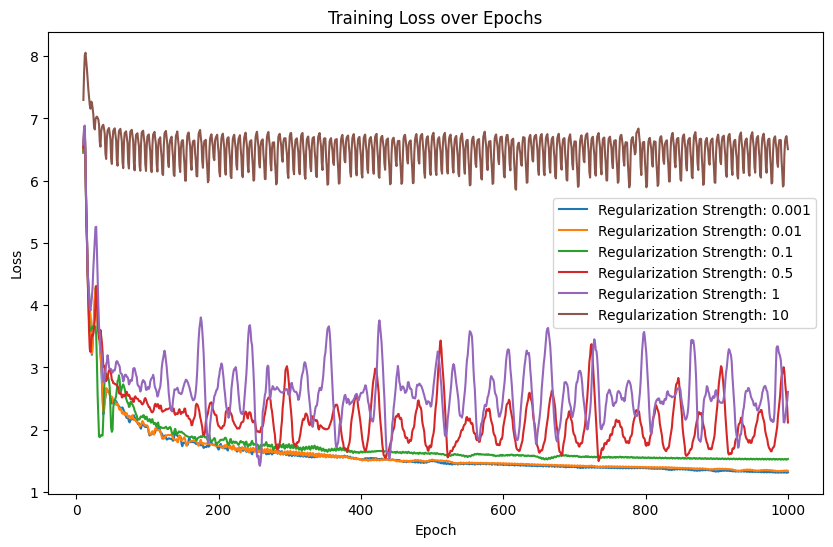

In [143]:
learning_rates=[]
reg_strength_values = [0.001, 0.01, 0.1,0.5,1,10]
softmax_instances=[]
labels=[]
for reg_strength in reg_strength_values:
    softmax_instance = SoftmaxRegression_another(num_of_features, num_of_classes, reg_strength=reg_strength)
    softmax_instance.fit(X_train, y_train, isprint=False)
    softmax_instances.append(softmax_instance)
    labels.append(f'{reg_strength}')
SoftmaxRegression_another.plot_losses(softmax_instances, labels)

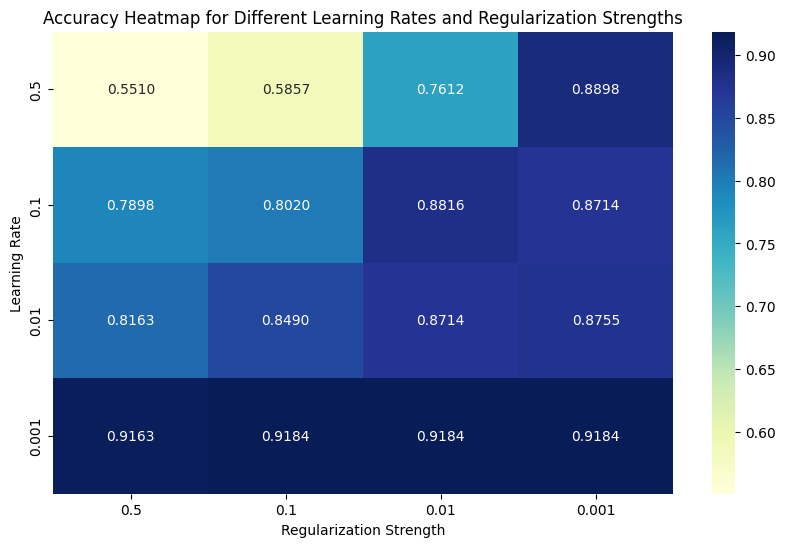

Best learning rate: 0.001
Best regularization strength: 0.1


In [144]:
lr_values = [0.5, 0.1, 0.01,0.001]
reg_strength_values = [0.5, 0.1, 0.01,0.001]
best_lr, best_reg_strength = SoftmaxRegression_another.grid_search(X_train, y_train, X_val, y_val, lr_values,reg_strength_values, num_epochs=1000)
print(f"Best learning rate: {best_lr}")
print(f"Best regularization strength: {best_reg_strength}")

Epoch 100/1000, Loss: 0.3672
Epoch 200/1000, Loss: 0.3293
Epoch 300/1000, Loss: 0.3115
Epoch 400/1000, Loss: 0.3000
Epoch 500/1000, Loss: 0.2915
Epoch 600/1000, Loss: 0.2848
Epoch 700/1000, Loss: 0.2794
Epoch 800/1000, Loss: 0.2749
Epoch 900/1000, Loss: 0.2712
Epoch 1000/1000, Loss: 0.2680


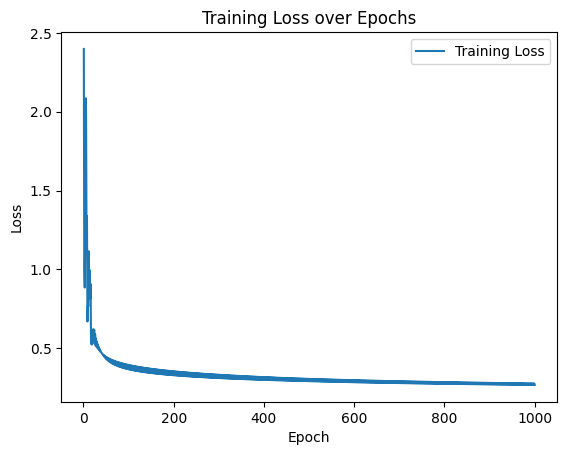

In [145]:
softmax_model_another = SoftmaxRegression_another(num_of_features, num_of_classes,best_lr,1000,best_reg_strength)
softmax_model_another.fit(X_train, y_train,True)

Precision:0.9627
Recall:0.9627
Accuracy:0.9627
F1_Score:0.9374


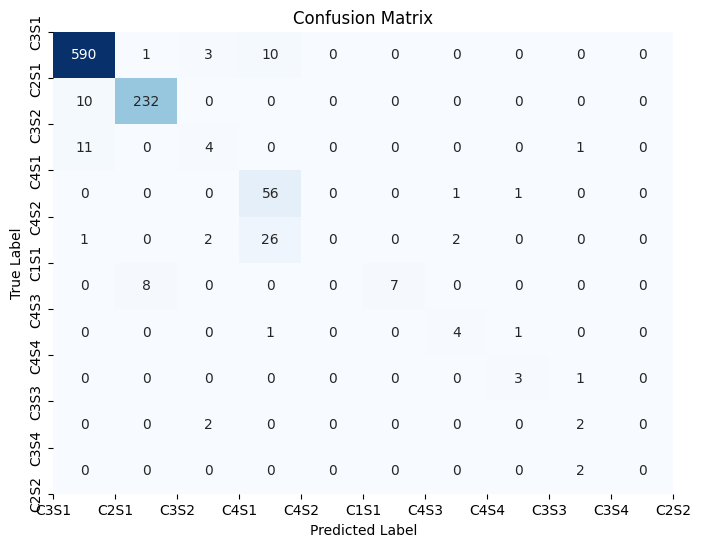

In [146]:
softmax_model_another.evaluate(X_test,y_test,True)

## To test ensemble learning( Soft Voting Classifier)

### Soft voting classifier combines predictions from multiple individual classifiers, averaging their outputs to make final decisions. It leverages the wisdom of crowds, often improving overall predictive performance and robustness.

In [147]:
class GaussianNaiveBayes:
    def __init__(self):
        self.class_prior = None
        self.class_mean = None
        self.class_variance = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize arrays to store class prior, mean, and variance
        self.class_prior = np.zeros(n_classes)
        self.class_mean = np.zeros((n_classes, n_features))
        self.class_variance = np.zeros((n_classes, n_features))

        # Compute class prior, mean, and variance for each class
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_prior[i] = len(X_c) / n_samples
            self.class_mean[i, :] = X_c.mean(axis=0)
            self.class_variance[i, :] = X_c.var(axis=0)

    def predict(self, X):
        y_pred = [self._predict_sample(x) for x in X]
        return np.array(y_pred)
    def predict_probabilities(self, X):
        posteriors = []
        for x in X:
            posteriors_for_sample = []
            for i, c in enumerate(self.classes):
                prior = self.class_prior[i]
                class_conditional = np.prod(self._pdf(i, x))
                posterior = prior * class_conditional
                posteriors_for_sample.append(posterior)
            posteriors.append(posteriors_for_sample)
        return np.array(posteriors)
    def predict_proba(self,x):
        posteriors = []
        # Compute posterior probability for each class
        for i, c in enumerate(self.classes):
            prior = self.class_prior[i]
            class_conditional = np.prod(self._pdf(i, x)) # Changed to product instead of sum
            posterior = prior * class_conditional
            posteriors.append(posterior)
        return posteriors
    def _predict_sample(self, x):
        posteriors = self.predict_proba(x)
        # Predict class label with maximum posterior probability
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.class_mean[class_idx]
        variance = self.class_variance[class_idx]
        numerator = np.exp(-(x - mean) ** 2 / ((2 * variance)+1e-10))
        denominator = np.sqrt(2 * np.pi * variance)

        # Handle potential division by zero errors
        denominator[denominator == 0] = 1e-10
        return numerator / denominator

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def precision(self, y_true, y_pred):
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        # Handle potential division by zero errors
        if tp + fp == 0:
            return 0
        return tp / (tp + fp)

    def recall(self, y_true, y_pred):
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        # Handle potential division by zero errors
        if tp + fn == 0:
            return 0
        return tp / (tp + fn)

    def f1_score(self, y_true, y_pred):
        precision_val = self.precision(y_true, y_pred)
        recall_val = self.recall(y_true, y_pred)
        # Handle potential division by zero errors
        if precision_val + recall_val == 0:
            return 0
        return 2 * (precision_val * recall_val) / (precision_val + recall_val)
    
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


In [148]:
def load_dataset():
    dataset_df1 = pd.read_csv(r"./Premonsoon/ground_water_quality_2018_pre.csv")
    dataset_df2 = pd.read_csv(r"./Premonsoon/ground_water_quality_2019_pre.csv")
    dataset_df3 = pd.read_csv(r"./Premonsoon/ground_water_quality_2020_pre.csv")
    dataset_df4 = pd.read_csv(r"./Premonsoon/ground_water_quality_2021_pre.csv")
    dataset_df5 = pd.read_csv(r"./Premonsoon/ground_water_quality_2022_pre.csv")
    dataset_df6 = pd.read_csv(r"./postmonsoon/ground_water_quality_2018_post.csv")
    dataset_df7 = pd.read_csv(r"./postmonsoon/ground_water_quality_2019_post.csv")
    dataset_df8 = pd.read_csv(r"./postmonsoon/ground_water_quality_2020_post.csv")
    dataset_df9 = pd.read_csv(r"./postmonsoon/ground_water_quality_2021_post.csv")
    dataset_df = pd.concat([dataset_df1,dataset_df2,dataset_df3,dataset_df4,dataset_df5,dataset_df6,dataset_df7,dataset_df8,dataset_df9],join='outer',ignore_index=True)
    dataset_df.drop(columns=['long_gis','lat_gis','sno','RL_GIS','sno','village','mandal','district','gwl','Classification.1','season'],inplace=True)

    dataset_df['pH'] = pd.to_numeric(dataset_df['pH'], errors='coerce')

    # Now convert to float
    dataset_df['pH'] = dataset_df['pH'].astype(float)
    dataset_df['RSC  meq  / L'] = pd.to_numeric(dataset_df['RSC  meq  / L'], errors='coerce')

    # Now convert to float
    dataset_df['RSC  meq  / L'] = dataset_df['RSC  meq  / L'].astype(float)

    temp = dataset_df['Classification'].copy()
    dataset_df['Classification'] = dataset_df['RSC  meq  / L']
    dataset_df['RSC  meq  / L'] = temp
    dataset_df = dataset_df.rename(columns={'Classification': 'RSC  meq  / L', 'RSC  meq  / L': 'Classification'})

    null_threshold = len(dataset_df) * 0.25
    for column in dataset_df.columns:
        null_count = dataset_df[column].isnull().sum()
        if null_count > null_threshold:
            dataset_df.drop(column, axis=1, inplace=True)
        elif null_count > 0:
            dataset_df.dropna(subset=[column], inplace=True)
    dataset_df.reset_index(drop=True, inplace=True)

    Classification_labels = []

    unique_labels = dataset_df['Classification'].unique()
    print(unique_labels)

    # Convert unique_labels to a set to remove duplicates and then back to a list
    Classification_labels = list(set(unique_labels))

    # Items to remove from the list
    items_to_remove = ['OG', 'BELOW THE GRAPH', 'O.G', 'OUT OF SAR GRAPH', 'BG']

    # Create a new list without the items to remove
    Classification_labels = [label for label in Classification_labels if label not in items_to_remove]

    # Filter dataset_df based on the updated Classification_labels
    dataset_df = dataset_df[dataset_df['Classification'].isin(Classification_labels)]

    dataset_df = dataset_df.reset_index(drop=True)
    print(dataset_df['Classification'].unique())
    print(dataset_df.info())
    return dataset_df
dataset_df = load_dataset()
from random import seed
from random import randrange
from math import sqrt
dataset_df['Classification'] = dataset_df['Classification'].map({'C2S1': 0, 'C3S1': 1, 'C4S2': 2, 'C4S1': 3, 'C3S2': 4
                                                                 , 'C4S4': 5, 'C4S3': 6, 'C1S1': 7, 'C3S4': 8, 'C3S3': 9, 'C2S2': 10}).astype(int)
input_X = dataset_df.drop(columns=['Classification'])
input_y = dataset_df['Classification']
print(input_y.value_counts())
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(input_X, input_y, test_size=0.20, random_state=42)
class DecisionTree:
    def __init__(self, max_depth=None, max_features=None):
        self.max_depth = max_depth
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        self.n_classes = len(np.unique(y))
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (depth == self.max_depth) or (n_classes == 1) or (n_samples < 2):
            return {'class': np.argmax(np.bincount(y)), 'split_feature': None, 'split_threshold': None,
                    'left': None, 'right': None}

        # Select random subset of features
        if self.max_features is not None and self.max_features < n_features:
            feature_idxs = np.random.choice(n_features, self.max_features, replace=False)
            X = X[:, feature_idxs]
        else:
            feature_idxs = np.arange(n_features)

        # Find best split
        best_gini = float('inf')
        best_split_feature, best_split_threshold = None, None
        for feature in feature_idxs:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_idxs = X[:, feature] < threshold
                y_left = y[left_idxs]
                y_right = y[~left_idxs]
                gini = (len(y_left) / n_samples) * self._gini_impurity(y_left) + \
                       (len(y_right) / n_samples) * self._gini_impurity(y_right)
                if gini < best_gini:
                    best_gini = gini
                    best_split_feature = feature
                    best_split_threshold = threshold

        # Split the dataset
        left_idxs = X[:, best_split_feature] < best_split_threshold
        right_idxs = ~left_idxs
        if np.sum(left_idxs) == 0:
            return {'class': np.argmax(np.bincount(y[right_idxs])), 'split_feature': None, 'split_threshold': None,
                    'left': None, 'right': None}

        # Check if right subtree is empty
        if np.sum(right_idxs) == 0:
            return {'class': np.argmax(np.bincount(y[left_idxs])), 'split_feature': None, 'split_threshold': None,
                    'left': None, 'right': None}
        
        # Grow left and right subtrees
        left_subtree = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right_subtree = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)

        return {'class': None, 'split_feature': best_split_feature, 'split_threshold': best_split_threshold,
                'left': left_subtree, 'right': right_subtree}

    def _gini_impurity(self, y):
        _, counts = np.unique(y, return_counts=True)
        probas = counts / len(y)
        return 1 - np.sum(probas ** 2)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree)[0] for x in X]),np.array([self._predict_tree(x, self.tree)[1] for x in X])

    def _predict_tree(self, x, tree):
        if tree['class'] is not None:
            return tree['class'], np.eye(1, self.n_classes, tree['class'])[0]

        if x[tree['split_feature']] < tree['split_threshold']:
            class_pred, class_probs = self._predict_tree(x, tree['left'])
        else:
            class_pred, class_probs = self._predict_tree(x, tree['right'])

        return class_pred, class_probs

class RandomForest:
    def __init__(self, n_trees=100, max_depth=None, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.classes_ = 11
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), size=len(X), replace=True)
            tree = DecisionTree(max_depth=self.max_depth, max_features=self.max_features)
            tree.fit(X.iloc[indices].values, y.iloc[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X.values)[0] for tree in self.trees])
        predictions=predictions.T
        predictions = np.array([np.bincount(pred).argmax() for pred in predictions])
        probs = np.zeros((len(X), self.classes_))
        for tree in self.trees:
            tree_probs = np.array([tree._predict_tree(x, tree.tree)[1] for x in X.values])
            if tree_probs.shape[1] < self.classes_:
                padded_probs = np.zeros((tree_probs.shape[0], self.classes_))
                padded_probs[:, :tree_probs.shape[1]] = tree_probs
                tree_probs = padded_probs
            probs += tree_probs
        probs /= self.n_trees
        return predictions,probs
    
    def predict_probabilities(self,X):
        predictions = np.array([tree.predict(X.values)[0] for tree in self.trees])
        predictions=predictions.T
        predictions = np.array([np.bincount(pred).argmax() for pred in predictions])
        probs = np.zeros((len(X), self.classes_))
        for tree in self.trees:
            tree_probs = np.array([tree._predict_tree(x, tree.tree)[1] for x in X.values])
            if tree_probs.shape[1] < self.classes_:
                padded_probs = np.zeros((tree_probs.shape[0], self.classes_))
                padded_probs[:, :tree_probs.shape[1]] = tree_probs
                tree_probs = padded_probs
            probs += tree_probs
        probs /= self.n_trees
        return probs
    
random_forest_probs = []
rf = RandomForest(n_trees=10,max_depth=7)
rf.fit(X_train_1, y_train_1)
predictions,probs = rf.predict(X_test_1)
random_forest_probs=probs

['C3S1' 'C2S1' 'C3S2' 'C4S1' 'C4S2' 'C1S1' 'C4S3' 'C4S4' 'C3S3' 'OG'
 'C3S4' 'BELOW THE GRAPH' 'O.G' 'OUT OF SAR GRAPH' 'C2S2' 'BG']
['C3S1' 'C2S1' 'C3S2' 'C4S1' 'C4S2' 'C1S1' 'C4S3' 'C4S4' 'C3S3' 'C3S4'
 'C2S2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907 entries, 0 to 4906
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pH              4907 non-null   float64
 1   E.C             4907 non-null   float64
 2   TDS             4907 non-null   float64
 3   CO3             4907 non-null   float64
 4   HCO3            4907 non-null   float64
 5   Cl              4907 non-null   float64
 6   F               4907 non-null   float64
 7   NO3             4907 non-null   float64
 8   SO4             4907 non-null   float64
 9   Na              4907 non-null   float64
 10  K               4907 non-null   float64
 11  Ca              4907 non-null   float64
 12  Mg              4907 non-null   float64
 13  

(982, 11)
(982, 11)
(982, 11)
[[8.20404477e-01 9.63526816e-07 1.29389685e-01 ... 8.53662361e-05
  1.52400688e-05 1.00778605e-04]
 [6.37441181e-01 1.09915362e-11 1.61507740e-01 ... 4.35745549e-04
  1.58562923e-04 1.25670457e-04]
 [6.64740707e-01 1.38299951e-01 1.14613575e-02 ... 3.06307809e-06
  1.83718032e-06 3.04935582e-04]
 ...
 [7.99013080e-01 1.57247354e-02 2.56519488e-04 ... 2.01326265e-06
  5.09413011e-07 2.91894754e-06]
 [6.28028347e-01 1.86949305e-01 1.05575546e-05 ... 1.00486553e-08
  9.80727647e-08 1.39486530e-07]
 [3.41754446e-09 2.87667201e-01 2.12728987e-11 ... 9.32733491e-17
  7.33630049e-17 4.70597893e-13]]
------------------------------------------------------/////////-----------------
[0 0 0 0 0 1 0 3 1 1 0 3 0 0 0 6 0 0 0 0 0 0 1 8 3 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 3 0 0 1 0 0 3 3 3 0 1 1 0 1 0 0 0 3 0 0 0 0 3 0 5 0 1 6 0 1 0 0 1
 0 1 0 1 0 1 0 0 3 0 0 1 0 1 1 1 3 0 0 3 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 0 3 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 3 3 1 0 1 0 1 0 3 0 1 1 1 0 0

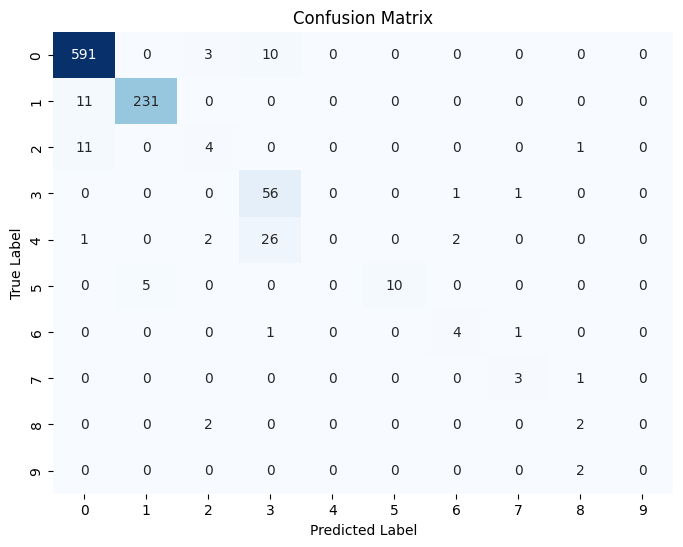

In [149]:
class SoftVotingClassifier:
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
    def predict(self, X):
        predictions = [model.predict_probabilities(X) for model in self.models]
        ensemble_predictions = np.mean(predictions, axis=0)  # Soft voting by averaging probabilities
        return np.argmax(ensemble_predictions, axis=1)
    def evaluate(self, X, y, print_confusion_matrix=False):
        # Calculate predictions separately for each model
        predictions_1 = np.array(self.models[0].predict_probabilities(X))#predictions from gaussian naive bayes
        predictions_2 = np.array(self.models[1].predict_probabilities(X))#predictions from softmax regression
        predictions_3 = np.array(random_forest_probs)#already present probabilities for 10 trees for same test data
        print(predictions_1.shape)
        print(predictions_2.shape)
        print(predictions_3.shape)
        # Take the mean of the predictions
        ensemble_predictions = 0.05*(predictions_1)+ 0.8*(predictions_2) + 0.15*(predictions_3)
        ensemble_predictions_class = np.argmax(ensemble_predictions,axis=1)
        print(ensemble_predictions)
        print("------------------------------------------------------/////////-----------------")   
        print(ensemble_predictions_class)
        accuracy = np.mean(ensemble_predictions_class == y)
    
        # Calculate precision, recall, and F1-score
        tp = np.sum((ensemble_predictions_class == y) & (ensemble_predictions_class == 1))
        fp = np.sum((ensemble_predictions_class != y) & (ensemble_predictions_class == 1))
        fn = np.sum((ensemble_predictions_class != y) & (ensemble_predictions_class == 0))
        precision = tp / (tp + fp) if (tp + fp != 0) else 0
        recall = tp / (tp + fn) if (tp + fn != 0) else 0
        f1_score = 2 * precision * recall / (precision + recall) if (precision + recall != 0) else 0
    
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1_score:.4f}")
    
        if print_confusion_matrix:
            confusion = confusion_matrix(y, ensemble_predictions_class)
            self.plot_confusion_matrix(confusion)
    @staticmethod
    def plot_confusion_matrix(confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Assuming you have instantiated and fitted GaussianNaiveBayes and SoftmaxRegression_another models
gnb_model = GaussianNaiveBayes()
softmax_model = SoftmaxRegression_another(num_of_features, num_of_classes,best_lr,1000,best_reg_strength)  # You need to provide num_of_features and num_of_classes
models = [gnb_model, softmax_model]
soft_voting_classifier = SoftVotingClassifier(models)
soft_voting_classifier.fit(X_train, y_train)
soft_voting_classifier.evaluate(X_test, y_test, print_confusion_matrix=True)


## Implementaion of softmax regression with reduced dataset obtained from pca

In [150]:
dataset_df_1 = pd.read_csv(r"C:\Users\koush\Desktop\GroundWater_analyzer\Reduced_features_dataset.csv")
#To remove rows containing null values
for index, row in dataset_df_1.iterrows():
    if 'NA' in row.values:
        dataset_df_1.drop(index, inplace=True)
    elif(row['Classification']=='OG')or(row['Classification']=='O.G')or(row['Classification']=='BELOW THE GRAPH')or(row['Classification']=='OUT OF SAR GRAPH')or(row['Classification']=='BG'):
        dataset_df_1.drop(index, inplace=True)
dataset_df_1.reset_index(drop=True, inplace=True)
null_threshold = len(dataset_df_1) * 0.25
for column in dataset_df_1.columns:
    null_count = dataset_df_1[column].isnull().sum()
    if null_count > null_threshold:
        dataset_df_1.drop(column, axis=1, inplace=True)
    elif null_count > 0:
        dataset_df_1.dropna(subset=[column], inplace=True)
dataset_df_1.reset_index(drop=True, inplace=True)
print(dataset_df_1.shape)
#encoding/labelling the target column
label_mapping = {
    label: index for index, label in enumerate(dataset_df_1['Classification'].unique())
}
# Map labels to numerical values
dataset_df_1['Classification'] = dataset_df_1['Classification'].map(label_mapping)
dataset_df_1['Classification'].unique()
# randomising the dataframe and splitting to get train and test dataframes
dataset_df_1 = dataset_df_1.sample(frac=1, random_state=42)
print(dataset_df_1.shape)
num_rows = len(dataset_df_1)
train_size = int(0.8 * num_rows)
test_size = num_rows - train_size
# Split the DataFrame into training and testing sets
train_dataset_df_1 = dataset_df_1.head(train_size)
test_dataset_df_1 = dataset_df_1.tail(test_size)
print(train_dataset_df_1.shape)
X_train_2 = train_dataset_df_1.drop(columns=['Classification'], axis=1).values
y_train_2 = train_dataset_df_1['Classification'].values
X_test_2 = test_dataset_df_1.drop(columns=['Classification'], axis=1).values
y_test_2 = test_dataset_df_1['Classification'].values
print("The shape of training data is (it is a dataframe):",X_train_2.shape)
num_of_features=X_train_2.shape[1]
num_of_classes=len(label_mapping)


(4907, 9)
(4907, 9)
(3925, 9)
The shape of training data is (it is a dataframe): (3925, 8)


Epoch 100/1000, Loss: 0.3764
Epoch 200/1000, Loss: 0.3420
Epoch 300/1000, Loss: 0.3262
Epoch 400/1000, Loss: 0.3166
Epoch 500/1000, Loss: 0.3101
Epoch 600/1000, Loss: 0.3055
Epoch 700/1000, Loss: 0.3021
Epoch 800/1000, Loss: 0.2995
Epoch 900/1000, Loss: 0.2975
Epoch 1000/1000, Loss: 0.2959


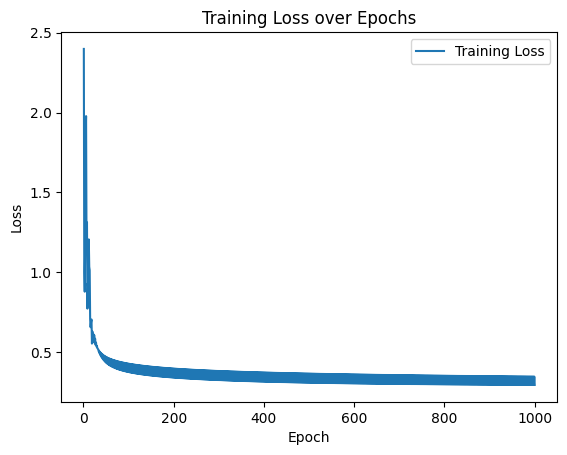

Precision:0.9502
Recall:0.9502
Accuracy:0.9502
F1_Score:0.9170


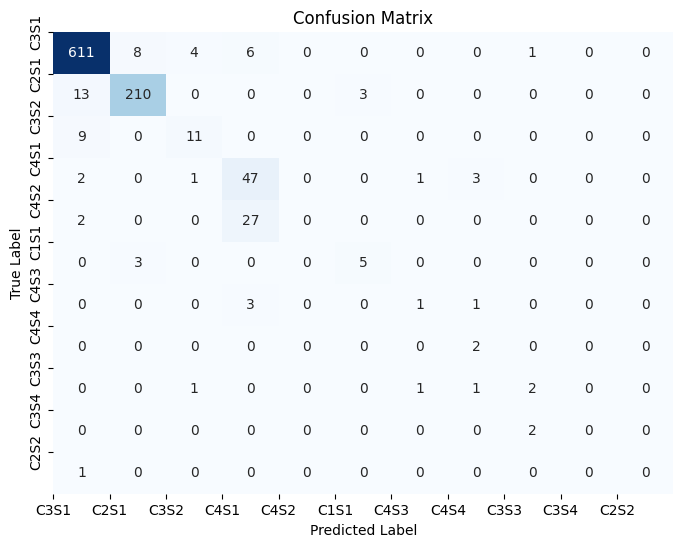

In [151]:
softmax_model_pca = SoftmaxRegression_another(num_of_features, num_of_classes,best_lr,1000,best_reg_strength)
softmax_model_pca.fit(X_train_2, y_train_2,True)
softmax_model_pca.evaluate(X_test_2,y_test_2,True)

Precision:0.9375
Recall:0.9375
Accuracy:0.9375
F1_Score:0.9032


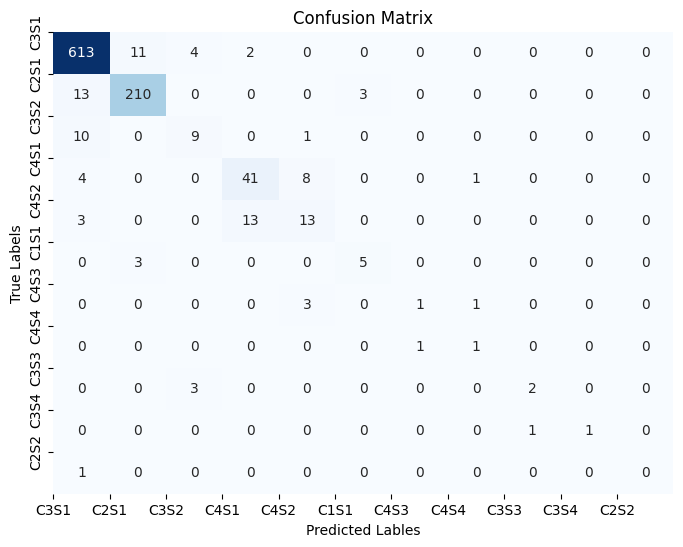

In [152]:
# with using scikit learns function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Train softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train_2, y_train_2)
# Predict on the test set
y_pred = softmax_reg.predict(X_test_2)
# Calculate accuracy,precision, recall,f1score
accuracy = np.mean(y_pred == y_test_2)
# Calculate precision, recall, and F1-score
tp = np.sum((y_pred == y_test_2) & (y_pred == 1))#true positives
fp = np.sum((y_pred != y_test_2) & (y_pred == 1))#false positives
fn = np.sum((y_pred != y_test_2) & (y_pred == 0))#false negatives
if (tp + fp != 0):
    precision = tp / (tp + fp)  
else:
    precision = 0
if (tp + fn != 0):
    recall = tp / (tp + fn) 
else :
    recall=0
if (precision+recall !=0):
    f1_score = 2 * precision * recall / (precision + recall)
else :
    f1_score=0
print(f"Precision:{precision:.4f}")
print(f"Recall:{precision:.4f}")
print(f"Accuracy:{precision:.4f}")
print(f"F1_Score:{f1_score:.4f}")

conf_matrix = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.xlabel('Predicted Lables')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## K-Fold cross validation

### K-fold cross-validation divides the dataset into k equal-sized subsets. It iteratively trains the model k times, using k-1 subsets for training and the remaining subset for validation. It provides robust performance estimation by averaging results across all iterations, reducing bias and variance in model evaluation.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class SoftmaxRegression_KFold:
    # Initialize your Softmax Regression model
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.001, num_epochs=1000, reg_strength=0.01):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.reg_strength = reg_strength
        self.loss_history = []
        self.W = np.zeros((num_of_features, num_of_classes))
        self.b = np.zeros(num_of_classes)
    # Softmax function
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    # One-hot encoding
    def one_hot_encode(self, y):
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1
        return one_hot_y
    # Cross-entropy loss function
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    # Training function
    def fit(self, X_train, y_train,isprint=False):
        y_train_one_hot = self.one_hot_encode(y_train)
        for epoch in range(self.num_epochs):
            z_train = np.dot(X_train, self.W) + self.b
            y_train_pred = self.softmax(z_train)
            loss = self.cross_entropy_loss(y_train_one_hot, y_train_pred)
            self.loss_history.append(loss)
            dz = y_train_pred - y_train_one_hot
            dW = np.dot(X_train.T, dz)
            db = np.sum(dz, axis=0)
            dW += self.reg_strength * self.W
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch + 1) % 100 == 0 and isprint:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        if isprint:
            self.plot_loss()
    # Prediction function
    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)
        return np.argmax(y_pred, axis=1)
    # Evaluation function
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        #print(f"Accuracy: {accuracy:.4f}")
        return accuracy
    # Plotting the loss
    def plot_loss(self):
        plt.plot(range(1, self.num_epochs + 1), self.loss_history, label='Training Loss')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
     
import itertools
# Grid search function
def grid_search(X, y, fold_size, learning_rates, reg_strengths, num_epochs=1000):
    best_accuracy = 0.0
    best_params = {}
    for lr, reg_strength in itertools.product(learning_rates, reg_strengths):
        print(f"Testing learning rate: {lr}, regularization strength: {reg_strength}")
        accuracies = []
        for i in range(fold_size):
            val_indices = list(range(i * fold_size, (i + 1) * fold_size))
            train_indices = list(set(range(len(X))) - set(val_indices))
            X_train, y_train = X[train_indices], y[train_indices]
            X_val, y_val = X[val_indices], y[val_indices]
            model = SoftmaxRegression_KFold(X.shape[1], len(np.unique(y)), lr, num_epochs, reg_strength)
            model.fit(X_train, y_train)
            accuracy = model.evaluate(X_val, y_val)
            accuracies.append(accuracy)
        avg_accuracy = np.mean(accuracies)
        print(f"Average accuracy: {avg_accuracy:.4f}")
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_params['learning_rate'] = lr
            best_params['reg_strength'] = reg_strength
    print(f"Best parameters: {best_params}")
    print(f"Best average accuracy: {best_accuracy:.4f}")

In [154]:
learning_rates=[0.001,0.01]
reg_strengths=[0.001,0.01]
grid_search(X_train,y_train,5,learning_rates,reg_strengths)

Testing learning rate: 0.001, regularization strength: 0.001
Average accuracy: 0.9200
Testing learning rate: 0.001, regularization strength: 0.01
Average accuracy: 0.9200
Testing learning rate: 0.01, regularization strength: 0.001
Average accuracy: 0.8800
Testing learning rate: 0.01, regularization strength: 0.01
Average accuracy: 0.9200
Best parameters: {'learning_rate': 0.001, 'reg_strength': 0.001}
Best average accuracy: 0.9200


Epoch 100/1000, Loss: 0.3666
Epoch 200/1000, Loss: 0.3286
Epoch 300/1000, Loss: 0.3107
Epoch 400/1000, Loss: 0.2990
Epoch 500/1000, Loss: 0.2903
Epoch 600/1000, Loss: 0.2835
Epoch 700/1000, Loss: 0.2779
Epoch 800/1000, Loss: 0.2732
Epoch 900/1000, Loss: 0.2693
Epoch 1000/1000, Loss: 0.2660


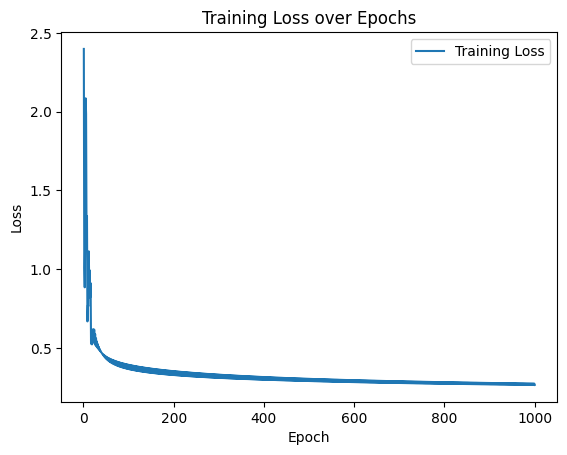

0.9154786150712831

In [155]:
softmax_with_kfold=SoftmaxRegression_KFold(X_train.shape[1], len(np.unique(y_train)),0.001,1000,0.001)
softmax_with_kfold.fit(X_train,y_train,True)
softmax_with_kfold.evaluate(X_test,y_test)